## Simulate using SEIRD epidemiological model

The first step to begin the simulation is to determine the differential equations reggarding the model. The SEIRD model divides the population into 5 groups, those suseptible to the disease $S(t)$, those who got the disease, but didn't develop symptoms yet $E(t)$, the ones who are infected and already show symptoms $I(t)$, those who recovered from the disease $R(t)$ and acquried immunicity and at last, the ones who sadly died from the disease $D(t)$.

The behavior of these populations is governed by exchanging rates, that is, rates in which individuals leave a group and get to another group.

![models.png](models.png)

With that in hands, we build the equations for the $S$ population

$$\frac{dS}{dt} = -\beta  \frac{S(t)I(t)}{N}$$

the $E$ population

$$\frac{dE}{dt} = \beta  \frac{S(t)I(t)}{N} - \alpha E(t)$$

the $I$ population

$$\frac{dI}{dt} = \alpha E(t) - \gamma I(t) - \delta I(t)$$

the $R$ population

$$\frac{dR}{dt} = \gamma I(t)$$

and the $D$ population

$$\frac{dD}{dt} = \delta I(t)$$

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

In [3]:
# Population of Bangladesh
N = 164467959

In [4]:
#data feeding
df = pd.read_csv("BD_CVdata.csv", header = 0) # dataset

df = df.iloc[26:,:]
df.shape
df.head(46)

,Date,Confirmed,Recovered,Daily_Confirmed,Deaths,Daily_Deaths,Total_Test,Number_of_daily_test,time
26,02-04-20,56,25,2,6,0,1906,147.0,27
27,03-04-20,61,26,5,6,0,2113,207.0,28
28,04-04-20,70,30,9,8,2,2547,434.0,29
29,05-04-20,88,33,18,9,1,2914,367.0,30
30,06-04-20,123,33,35,12,3,3610,696.0,31
31,07-04-20,164,33,41,17,5,4402,792.0,32
32,08-04-20,218,33,54,20,3,5383,981.0,33
33,09-04-20,330,33,112,21,1,6480,1097.0,34
34,10-04-20,424,33,94,27,6,7664,1184.0,35
35,11-04-20,482,36,58,30,3,8313,649.0,36


In [5]:
available = len(df.index)
print("Available", available, "days")

Available 45 days


In [6]:
start_date = df['Date'].iloc[0]
confirmed = df['Confirmed'].values.tolist()
recovered = df['Recovered'].values.tolist()
deaths = df['Deaths'].values.tolist()
test = df['Number_of_daily_test'].values.tolist()
tt = df['Total_Test'].values.tolist()

infected = [ c - r - d for (c, r, d) in zip(confirmed, recovered, deaths)]

In [7]:
print(confirmed)

[56, 61, 70, 88, 123, 164, 218, 330, 424, 482, 621, 803, 1012, 1231, 1572, 1838, 2144, 2456, 2948, 3382, 3772, 4186, 4689, 4998, 5416, 5913, 6462, 7103, 7667, 8238, 8790, 9455, 10143, 10929, 11719, 12425, 13134, 13770, 14657, 15691, 16660, 17822, 18863, 20065, 20995]


In [8]:
print(start_date)

02-04-20


In [9]:
#Helper Function

t_max = available + 7

date = np.array('2020-04-02', dtype=np.datetime64) 
dates = date + np.arange(t_max)
str_dates = []
for i in dates:
    str_dates.append(str(i))

print(str_dates)
print(len(str_dates))

['2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23']
52


In [10]:
def seird_model(init_vals, params, t):

    DATE_0, S_0, E_0, I_0, R_0, D_0 = init_vals
    DATE, S, E, I, R, D = [DATE_0], [S_0], [E_0], [I_0], [R_0], [D_0]
    alpha, beta, gamma, delta = params
    
    ##### Create next t days ######
    date = np.array(DATE, dtype=np.datetime64)
    dates = date + np.arange(len(t))
    str_dates = []
    for i in dates:
        str_dates.append(str(i))
        
    ##### End creating t days #####
    for tic in t[1:]:

        DATE.append(str_dates[tic])

        next_S = S[-1] - ( beta * (S[-1] / N) * I[-1] )  # Susceptible
        next_E = E[-1] + ( beta * (S[-1] / N) * I[-1] ) - ( alpha * E[-1] ) # Exposed
        next_I = I[-1] + ( alpha * E[-1] ) - ( gamma * I[-1] ) - ( delta * I[-1] ) # Infected
        next_R = R[-1] + ( gamma * I[-1] ) # Recovered
        next_D = D[-1] + ( delta * I[-1] ) # Deaths
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        D.append(next_D)
        
    return np.stack([DATE, S, E, I, R, D]).T

In [11]:
# Spliting the data for one day rolling window approach

train_min = 1
train_max = available + 1

inf_train = []
rec_train = []
death_train = []

for i in range(train_min+1, train_max):
    j = i - 2
    inf_train.append(infected[j:i])
    rec_train.append(recovered[j:i])
    death_train.append(deaths[j:i])

In [12]:
# for i in range(len(rec_train)): 
#     print(i, rec_train[i])

In [13]:
t2 = np.arange(0, 3, 1)
print(t2)

[0 1 2]


In [14]:
last5_vals = []
last5_params = []

t_incub = 5  # Assumption 5 days

for sample in range(len(inf_train)):

    i_0 = inf_train[sample][0]
    i_1 = inf_train[sample][1]
    i_diff = i_1 - i_0


    r_0 = rec_train[sample][0]
    r_1 = rec_train[sample][1]
    r_diff = r_1 - r_0


    d_0 = death_train[sample][0]
    d_1 = death_train[sample][1]
    d_diff = d_1 - d_0


    if (sample == 0):

        e_0 = confirmed[t_incub] - confirmed[sample]
        e_1 = confirmed[t_incub + 1] - confirmed[sample + 1]
        e_diff = e_1 - e_0
        print(e_0,e_1)
        s_0 = N - e_0 - i_0 - r_0 - d_0 


    alpha = ( i_diff + r_diff + d_diff) / e_0  # alpha
    beta = ( ( ( e_diff + i_diff + r_diff + d_diff) * N ) / ( s_0 * i_0 ) ) # beta
    gamma = r_diff / i_0  # gamma
    delta = d_diff / i_0  # delta

    init_vals = str_dates[sample], s_0, e_0, i_0, r_0, d_0
    params = alpha, beta, gamma, delta
    pred = seird_model(init_vals, params, t2)
    
    # Date: 0, S:1, E:2, I:3, R:4, D:5
    s_0 = float(pred[1][1])
    
    e_0 = float(pred[1][2])
    e_1 = float(pred[2][2])
    e_diff = e_1 - e_0

    # Store Last five cases for predecting future
    if ((len( inf_train )  - sample ) <= 5):
        print(str_dates[sample])
        last5_vals.append(init_vals)
        last5_params.append(params)

108 157
2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15


In [15]:
import matplotlib.pyplot as plt

In [16]:
print(dates)

['2020-04-02' '2020-04-03' '2020-04-04' '2020-04-05' '2020-04-06'
 '2020-04-07' '2020-04-08' '2020-04-09' '2020-04-10' '2020-04-11'
 '2020-04-12' '2020-04-13' '2020-04-14' '2020-04-15' '2020-04-16'
 '2020-04-17' '2020-04-18' '2020-04-19' '2020-04-20' '2020-04-21'
 '2020-04-22' '2020-04-23' '2020-04-24' '2020-04-25' '2020-04-26'
 '2020-04-27' '2020-04-28' '2020-04-29' '2020-04-30' '2020-05-01'
 '2020-05-02' '2020-05-03' '2020-05-04' '2020-05-05' '2020-05-06'
 '2020-05-07' '2020-05-08' '2020-05-09' '2020-05-10' '2020-05-11'
 '2020-05-12' '2020-05-13' '2020-05-14' '2020-05-15' '2020-05-16'
 '2020-05-17' '2020-05-18' '2020-05-19' '2020-05-20' '2020-05-21'
 '2020-05-22' '2020-05-23']


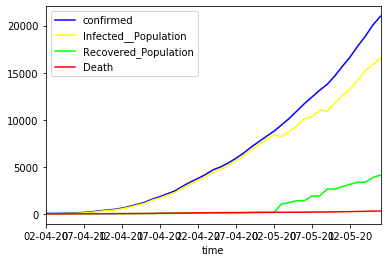

In [23]:
ff = pd.DataFrame() 
ff['time'] = df['Date']
ff['confirmed'] =  df['Confirmed']

ff['Infected__Population'] = infected
ff['Recovered_Population'] = df['Recovered']
ff['Death'] = df['Deaths']

ff.plot('time', y=['confirmed',  'Infected__Population', 'Recovered_Population','Death' ], 
    color=['blue', 'yellow', 'lime', 'red'])
plt.show()

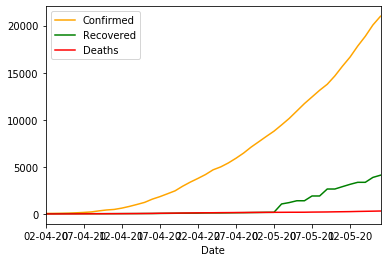

In [20]:
df.plot('Date', y=[ 'Confirmed', 'Recovered', 'Deaths' ], 
    color=[ 'orange', 'green','red'])
plt.show()

In [20]:
for v in last5_vals: 
    print(v)

('2020-05-11', 164141691.91964337, 310576.08035669755, 12550, 2902, 239)
('2020-05-12', 164117266.11307353, 334032.8869265503, 13263, 3147, 250)
('2020-05-13', 164091336.63600972, 358800.36399035, 14192, 3361, 269)
('2020-05-14', 164063802.48433688, 385293.5156631829, 15219, 3361, 283)
('2020-05-15', 164034196.65170306, 413697.3482970174, 15885, 3882, 298)


In [21]:
for p in last5_params: 
    print(p)

(0.0031200084658390323, 1.9501480588309268, 0.01952191235059761, 0.0008764940239043825)
(0.003478699390025957, 1.9592011079054543, 0.01613511271959587, 0.001432556736786549)
(0.002901334849336992, 1.944570747300944, 0.0, 0.0009864712514092446)
(0.0031196995307099023, 1.9501126195392255, 0.03423352388461791, 0.0009856100926473486)
(0.0022480202104952795, 1.9273512092211476, 0.014793830657853321, 0.0010072395341517155)


Based on each learned parameter, we will predict values from 10 April to 16 April

In [22]:
# How many days should we use ?? and Why ?? 
t7 = np.arange(0, 14, 1)
print(t7)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


# DATE, S, E, Infected, Recovered, Death

In [23]:
for z in range(1, len(last5_params)+1):
    results = seird_model(last5_vals[z-1], last5_params[z-1], t7)
    t_z = np.arange(6 - z, 15 - z, 1)
    print("Predictions using", last5_vals[z-1][0], "parameters\n")
    print("-----------------------------------------------------")
    print("Date", "\t\tInfected", "\tRecovered", "\tDeaths")
    print("-----------------------------------------------------")
    for day in t_z:
        print(results[day][0], "\t", int(float(results[day][3])), "\t\t", int(float(results[day][4])), "\t\t", int(float(results[day][5])) )
    print("----------------------------------------------------\n\n")

Predictions using 2020-05-11 parameters

-----------------------------------------------------
Date 		Infected 	Recovered 	Deaths
-----------------------------------------------------
2020-05-16 	 16731 		 4277 		 300
2020-05-17 	 17769 		 4604 		 315
2020-05-18 	 18883 		 4951 		 331
2020-05-19 	 20078 		 5320 		 347
2020-05-20 	 21358 		 5712 		 365
2020-05-21 	 22728 		 6129 		 383
2020-05-22 	 24194 		 6572 		 403
2020-05-23 	 25762 		 7045 		 425
2020-05-24 	 27438 		 7547 		 447
----------------------------------------------------


Predictions using 2020-05-12 parameters

-----------------------------------------------------
Date 		Infected 	Recovered 	Deaths
-----------------------------------------------------
2020-05-16 	 17417 		 4097 		 334
2020-05-17 	 18656 		 4378 		 359
2020-05-18 	 19985 		 4679 		 386
2020-05-19 	 21413 		 5002 		 414
2020-05-20 	 22945 		 5347 		 445
2020-05-21 	 24588 		 5717 		 478
2020-05-22 	 26352 		 6114 		 513
2020-05-23 	 28244 		 6539 		 551

If We calculate the Exposed by taking the number the test per day

In [24]:


last5_vals = []
last5_params = []

t_incub = 5  # Assumption 5 days

for sample in range(len(inf_train)):

    i_0 = inf_train[sample][0]
    i_1 = inf_train[sample][1]
    i_diff = i_1 - i_0


    r_0 = rec_train[sample][0]
    r_1 = rec_train[sample][1]
    r_diff = r_1 - r_0


    d_0 = death_train[sample][0]
    d_1 = death_train[sample][1]
    d_diff = d_1 - d_0

    e_0 = test[sample] 
    e_1 = test[sample+1]
    e_diff = e_1 - e_0
    s_0 = N - e_0 - i_0 - r_0 - d_0

#     if (sample == 0):

#         e_0 = tt[sample] 
#         e_1 = tt[sample + 1]
#         e_diff = e_1 - e_0
#         print(e_0,e_1)
#         s_0 = N - e_0 - i_0 - r_0 - d_0 
   

    alpha = ( i_diff + r_diff + d_diff) / e_0  # alpha
    beta = ( ( ( e_diff + i_diff + r_diff + d_diff) * N ) / ( s_0 * i_0 ) ) # beta
    gamma = r_diff / i_0  # gamma
    delta = d_diff / i_0  # delta

    init_vals = str_dates[sample], s_0, e_0, i_0, r_0, d_0
    params = alpha, beta, gamma, delta
    pred = seird_model(init_vals, params, t2)
    
    # Date: 0, S:1, E:2, I:3, R:4, D:5
#     s_0 = float(pred[1][1])
    
#     e_0 = float(pred[1][2])
#     e_1 = float(pred[2][2])
#     e_diff = e_1 - e_0

    # Store Last five cases for predecting future
    if ((len( inf_train )  - sample ) <= 5):
        print(str_dates[sample])
        last5_vals.append(init_vals)
        last5_params.append(params)

2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15


In [25]:
for v in last5_vals: 
    print(v)

('2020-05-11', 164445060.0, 7208.0, 12550, 2902, 239)
('2020-05-12', 164444526.0, 6773.0, 13263, 3147, 250)
('2020-05-13', 164442237.0, 7900.0, 14192, 3361, 269)
('2020-05-14', 164441704.0, 7392.0, 15219, 3361, 283)
('2020-05-15', 164439312.0, 8582.0, 15885, 3882, 298)


In [26]:
for p in last5_params: 
    print(p)

(0.13443396226415094, 0.04255572586314461, 0.01952191235059761, 0.0008764940239043825)
(0.1715635611988779, 0.17260998097703148, 0.01613511271959587, 0.001432556736786549)
(0.13177215189873417, 0.037562244340661334, 0.0, 0.0009864712514092446)
(0.16260822510822512, 0.15719705040904738, 0.03423352388461791, 0.0009856100926473486)
(0.1083663481705896, -0.054778190925103186, 0.014793830657853321, 0.0010072395341517155)


In [27]:
# How many days should we use ?? and Why ?? 
t7 = np.arange(0, 14, 1)
print(t7)
for z in range(1, len(last5_params)+1):
    results = seird_model(last5_vals[z-1], last5_params[z-1], t7)
    t_z = np.arange(6 - z, 15 - z, 1)
    print("Predictions using", last5_vals[z-1][0], "parameters\n")
    print("-----------------------------------------------------")
    print("Date", "\t\tInfected", "\tRecovered", "\tDeaths")
    print("-----------------------------------------------------")
    for day in t_z:
        print(results[day][0], "\t", int(float(results[day][3])), "\t\t", int(float(results[day][4])), "\t\t", int(float(results[day][5])) )
    print("----------------------------------------------------\n\n")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Predictions using 2020-05-11 parameters

-----------------------------------------------------
Date 		Infected 	Recovered 	Deaths
-----------------------------------------------------
2020-05-16 	 15507 		 4253 		 299
2020-05-17 	 15969 		 4555 		 313
2020-05-18 	 16405 		 4867 		 327
2020-05-19 	 16820 		 5187 		 341
2020-05-20 	 17221 		 5516 		 356
2020-05-21 	 17609 		 5852 		 371
2020-05-22 	 17989 		 6196 		 386
2020-05-23 	 18362 		 6547 		 402
2020-05-24 	 18731 		 6905 		 418
----------------------------------------------------


Predictions using 2020-05-12 parameters

-----------------------------------------------------
Date 		Infected 	Recovered 	Deaths
-----------------------------------------------------
2020-05-16 	 18012 		 4104 		 334
2020-05-17 	 19620 		 4394 		 360
2020-05-18 	 21404 		 4711 		 388
2020-05-19 	 23371 		 5056 		 419
2020-05-20 	 25536 		 5433 		 453
2020-05-21 	 27913 		 5845 		 489
2020-05-22 	 30520 		 6

In [67]:
print(results)

[['2020-05-15' '164439312.0' '8582.0' '15885.0' '3882.0' '298.0']
 ['2020-05-16' '164440182.0' '6782.0' '16564.0' '4117.0' '314.0']
 ['2020-05-17' '164441089.19271278' '5139.866713917238'
  '17037.211646632568' '4362.045011016682' '330.68391564368903']
 ['2020-05-18' '164442022.30787343' '3649.762967409556'
  '17324.99405539886' '4614.090634998971' '347.8444687658874']
 ['2020-05-19' '164442971.1900427' '2305.3693136682755'
  '17446.75209271986' '4870.393663202857' '365.29488770742864']
 ['2020-05-20' '164443926.74635902' '1099.9885436562417'
  '17420.899191987053' '5128.497959192103' '382.8679461577603']
 ['2020-05-21' '164444880.89225975' '26.64090143344201'
  '17264.832082552133' '5386.219791745893' '400.4149645444013']
 ['2020-05-22' '164445826.49582234' '-921.8496383701627'
  '16994.916236162862' '5641.632793911443' '417.8047859684387']
 ['2020-05-23' '164446757.32131034' '-1752.7776475053367'
  '16626.48089293545' '5893.052706753638' '434.9227374810988']
 ['2020-05-24' '164447667

In [87]:
ift = []
rec = []
det = []


for z in range(1, len(last5_params)+1):
    results = seird_model(last5_vals[z-1], last5_params[z-1], t7)
    t_z = np.arange(8 - z, 15 - z, 1)
    
    ift.append(int(float(results[2][3])))
    rec.append(int(float(results[2][4])))
    det.append(int(float(results[2][5])))
        


print(det)
t_z = np.arange(1,7, 1)
for day in t_z:
    print(results[day])
        

[261, 289, 298, 313, 330]
['2020-05-16' '164440182.0' '6782.0' '16564.0' '4117.0' '314.0']
['2020-05-17' '164441089.19271278' '5139.866713917238'
 '17037.211646632568' '4362.045011016682' '330.68391564368903']
['2020-05-18' '164442022.30787343' '3649.762967409556' '17324.99405539886'
 '4614.090634998971' '347.8444687658874']
['2020-05-19' '164442971.1900427' '2305.3693136682755' '17446.75209271986'
 '4870.393663202857' '365.29488770742864']
['2020-05-20' '164443926.74635902' '1099.9885436562417'
 '17420.899191987053' '5128.497959192103' '382.8679461577603']
['2020-05-21' '164444880.89225975' '26.64090143344201'
 '17264.832082552133' '5386.219791745893' '400.4149645444013']


# seird_model_wsd

In [29]:
def seird_model_wsd(init_vals, params, t,rho):

    DATE_0, S_0, E_0, I_0, R_0, D_0 = init_vals
    DATE, S, E, I, R, D = [DATE_0], [S_0], [E_0], [I_0], [R_0], [D_0]
    alpha, beta, gamma, delta = params
    
    ##### Create next t days ######
    date = np.array(DATE, dtype=np.datetime64)
    dates = date + np.arange(len(t))
    str_dates = []
    for i in dates:
        str_dates.append(str(i))
        
    ##### End creating t days #####
    for tic in t[1:]:

        DATE.append(str_dates[tic])

        next_S = S[-1] - ( rho*beta * (S[-1] / N) * I[-1] )  # Susceptible
        next_E = E[-1] + ( rho*beta * (S[-1] / N) * I[-1] ) - ( alpha * E[-1] ) # Exposed
        next_I = I[-1] + ( alpha * E[-1] ) - ( gamma * I[-1] ) - ( delta * I[-1] ) # Infected
        next_R = R[-1] + ( gamma * I[-1] ) # Recovered
        next_D = D[-1] + ( delta * I[-1] ) # Deaths
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        D.append(next_D)
        
    return np.stack([DATE, S, E, I, R, D]).T

In [35]:
train_min = 1
train_max = available + 1

inf_train = []
rec_train = []
death_train = []

for i in range(train_min+1, train_max):
    j = i - 2
    inf_train.append(infected[j:i])
    rec_train.append(recovered[j:i])
    death_train.append(deaths[j:i])
    
t2 = np.arange(0, 3, 1)

last5_vals = []
last5_params = []

t_incub = 5  # Assumption 5 days

for sample in range(len(inf_train)):

    i_0 = inf_train[sample][0]
    i_1 = inf_train[sample][1]
    i_diff = i_1 - i_0


    r_0 = rec_train[sample][0]
    r_1 = rec_train[sample][1]
    r_diff = r_1 - r_0


    d_0 = death_train[sample][0]
    d_1 = death_train[sample][1]
    d_diff = d_1 - d_0


    if (sample == 0):

        e_0 = confirmed[t_incub] - confirmed[sample]
        e_1 = confirmed[t_incub + 1] - confirmed[sample + 1]
        e_diff = e_1 - e_0
        print(e_0,e_1)
        s_0 = N - e_0 - i_0 - r_0 - d_0 


    alpha = ( i_diff + r_diff + d_diff) / e_0  # alpha
    beta = ( ( ( e_diff + i_diff + r_diff + d_diff) * N ) / ( s_0 * i_0 ) ) # beta
    gamma = r_diff / i_0  # gamma
    delta = d_diff / i_0  # delta

    init_vals = str_dates[sample], s_0, e_0, i_0, r_0, d_0
    params = alpha, beta, gamma, delta
    pred = seird_model_wsd(init_vals, params, t2,0.9)
    
    # Date: 0, S:1, E:2, I:3, R:4, D:5
    s_0 = float(pred[1][1])
    
    e_0 = float(pred[1][2])
    e_1 = float(pred[2][2])
    e_diff = e_1 - e_0

    # Store Last five cases for predecting future
    if ((len( inf_train )  - sample ) <= 5):
        print(str_dates[sample])
        last5_vals.append(init_vals)
        last5_params.append(params)

108 157
2020-05-11
2020-05-12
2020-05-13
2020-05-14
2020-05-15


In [31]:
for p in last5_params: 
    print(p)

(0.0031200084658390323, 1.9501480588309268, 0.01952191235059761, 0.0008764940239043825)
(0.003478699390025957, 1.9592011079054543, 0.01613511271959587, 0.001432556736786549)
(0.002901334849336992, 1.944570747300944, 0.0, 0.0009864712514092446)
(0.0031196995307099023, 1.9501126195392255, 0.03423352388461791, 0.0009856100926473486)
(0.0022480202104952795, 1.9273512092211476, 0.014793830657853321, 0.0010072395341517155)


In [36]:
for p in last5_params: 
    print(p)

(0.10887416655007984, 0.06692077751948904, 0.01952191235059761, 0.0008764940239043825)
(0.13376401652057265, 0.07653345459524041, 0.01613511271959587, 0.001432556736786549)
(0.12336525919074735, 0.06269617231886455, 0.0, 0.0009864712514092446)
(0.1466205188685629, 0.06895555064452312, 0.03423352388461791, 0.0009856100926473486)
(0.11712301036017933, 0.047312686058343836, 0.014793830657853321, 0.0010072395341517155)


In [37]:
t7 = np.arange(0, 14, 1)
print(t7)
for z in range(1, len(last5_params)+1):
    results = seird_model(last5_vals[z-1], last5_params[z-1], t7)
    t_z = np.arange(6 - z, 15 - z, 1)
    print("Predictions using", last5_vals[z-1][0], "parameters\n")
    print("-----------------------------------------------------")
    print("Date", "\t\tInfected", "\tRecovered", "\tDeaths")
    print("-----------------------------------------------------")
    for day in t_z:
        print(results[day][0], "\t", int(float(results[day][3])), "\t\t", int(float(results[day][4])), "\t\t", int(float(results[day][5])) )
    print("----------------------------------------------------\n\n")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Predictions using 2020-05-11 parameters

-----------------------------------------------------
Date 		Infected 	Recovered 	Deaths
-----------------------------------------------------
2020-05-16 	 15896 		 4261 		 300
2020-05-17 	 16529 		 4571 		 313
2020-05-18 	 17161 		 4894 		 328
2020-05-19 	 17794 		 5229 		 343
2020-05-20 	 18433 		 5576 		 359
2020-05-21 	 19079 		 5936 		 375
2020-05-22 	 19735 		 6309 		 391
2020-05-23 	 20403 		 6694 		 409
2020-05-24 	 21085 		 7092 		 427
----------------------------------------------------


Predictions using 2020-05-12 parameters

-----------------------------------------------------
Date 		Infected 	Recovered 	Deaths
-----------------------------------------------------
2020-05-16 	 16811 		 4090 		 333
2020-05-17 	 17665 		 4362 		 357
2020-05-18 	 18521 		 4647 		 383
2020-05-19 	 19388 		 4945 		 409
2020-05-20 	 20269 		 5258 		 437
2020-05-21 	 21170 		 5585 		 466
2020-05-22 	 22094 		 5

In [1]:
t_max = 80 #Maximum time, in days
dt = .1 #time steps, in days

#create time datapoints for our calculation
t = np.linspace(0, t_max, int(t_max/dt) + 1) 

print(len(t))
N = 164467959  #total population
E = 21311 * 10
S = N - E- 21311 - 6330 - 464
init_vals =S  ,E,21311,6330,464


alpha = 0.11712301036017933  

beta = 0.047312686058343836

gamma = 0.014793830657853321

delta = 0.0010072395341517155

params = 0.11712301036017933, 0.047312686058343836, 0.014793830657853321, 0.0010072395341517155



NameError: name 'np' is not defined

In [66]:
def seird_model_with_soc_dist(init_vals, params, t, rho):
    S_0, E_0, I_0, R_0, D_0 = init_vals
    S, E, I, R, D = [S_0], [E_0], [I_0], [R_0], [D_0]
    alpha, beta, gamma, delta = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - ( rho*beta * (S[-1] / N) * I[-1] )  # Susceptible
        next_E = E[-1] + ( rho*beta * (S[-1] / N) * I[-1] ) - ( alpha * E[-1] ) # Exposed
        next_I = I[-1] + ( alpha * E[-1] ) - ( gamma * I[-1] ) - ( delta * I[-1] ) # Infected
        next_R = R[-1] + ( gamma * I[-1] ) # Recovered
        next_D = D[-1] + ( delta * I[-1] ) # Deaths
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        D.append(next_D)
        
        
    return S, E, I, R, D, t

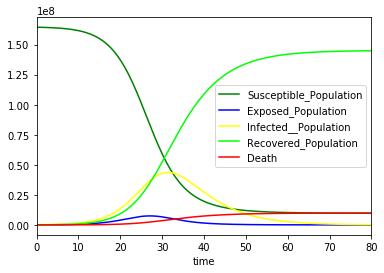

In [67]:
# Run the claculation
results = seird_model_with_soc_dist(init_vals, params, t, .8)
# Plot results
S, E, I, R, D, t = results

ff = pd.DataFrame() 
ff['time'] = t
ff['Susceptible_Population'] = S
ff['Exposed_Population'] = E
ff['Infected__Population'] = I
ff['Recovered_Population'] = R
ff['Death'] = D

ff.plot('time', y=['Susceptible_Population', 'Exposed_Population', 'Infected__Population', 'Recovered_Population','Death' ], 
    color=['green', 'blue', 'yellow', 'lime', 'red'])
plt.show()